In [1]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt
import pandas as pd

## Fonts

In [2]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

## Player Values

In [3]:
#read in data
df=pd.read_csv('RaphinhaVZiyech.csv')
df
df.dropna()

,Player,SoT%,npxG,Pass Cmp%,xA,Shot Assists,Passes into Final Third,Prog Passes,SCA,Passes Under Pressure,Switches,Crosses,Drib Succ%,Players Drib Past,Prog Carries,Carries into Final Third
0,Raphinha,31.1,0.24,65.0,0.25,2.22,2.84,5.09,3.99,5.07,2.27,2.73,45.1,2.38,5.86,1.32
1,Ziyech,35.2,0.19,74.2,0.26,2.31,3.47,5.27,4.84,6.68,2.09,3.86,53.0,2.02,6.53,1.70


In [4]:
params = list(df.columns)
params = params[1:]
params

['SoT%',
 'npxG',
 'Pass Cmp%',
 'xA',
 'Shot Assists',
 'Passes into Final Third',
 'Prog Passes',
 'SCA',
 'Passes Under Pressure',
 'Switches',
 'Crosses',
 'Drib Succ%',
 'Players Drib Past',
 'Prog Carries',
 'Carries into Final Third']

In [5]:
# The lower and upper boundaries for the statistics
low=[]
high=[]
for x in params:
    a=min(df[params][x])
    a=a-(a*0.25)
    low.append(a)
    
    b=max(df[params][x])
    b=b+(b*0.05) 
    high.append(b)

#Player values
a_values=[]
b_values=[]
c_values=[]
d_values=[]
for x in range(len(df['Player'])): #make sure column in data is is called Player with all the player names
    if df['Player'][x] == 'Raphinha': #adjust the names here
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Pulisic':
        b_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'CHO':
        c_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Ziyech':
        d_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:] #change the values so that it doesn't inlcude the name, only the stats
b_values = b_values[1:]
c_values = c_values[1:]
d_values = d_values[1:]

## Instantiate the Radar Class

In [6]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              
              round_int=[False]*15, #change this depending on nuumberr of pizza slices you want
              
              num_rings=5,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

## Radar Chart Plot

In [7]:
#COLOURS, PUT THESE CODES IN 'facecolor' and 'c' (next to edgecolor)
#blue - 1A78CF
#red - D2042D
#green - 0BDA51
#orange - FF9300
#Teal - 00f2c1
#Pink - d80499
#yellow - FFFF00
#purple - 9D00FF

#141d26 - page background
#28252c - Ring Colour

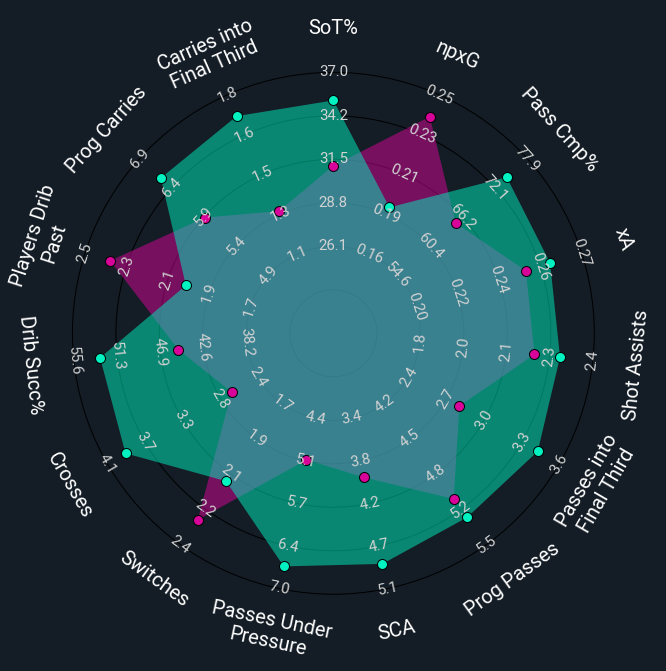

In [10]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='none', edgecolors='#000000')  # draw circles

radar.setup_axis(ax=ax, facecolor='none')# format axis as a radar

#To add more radars, just copy one and paste below
#To delete radars, just put a hastag in front of the line or delete the code part
radar_output1 = radar.draw_radar(a_values, ax=ax,
                                kwargs_radar={'facecolor': '#d80499', 'alpha': 0.5},
                                kwargs_rings={'facecolor': 'none','edgecolors':'none'})  # draw the radar

#radar_output2 = radar.draw_radar(b_values, ax=ax,
                                #kwargs_radar={'facecolor': '#1A78CF', 'alpha': 0.5},
                                #kwargs_rings={'facecolor': 'none','edgecolors':'none'})

#radar_output3 = radar.draw_radar(c_values, ax=ax,
                                #kwargs_radar={'facecolor': '#D2042D', 'alpha': 0.5},
                                #kwargs_rings={'facecolor': 'none','edgecolors':'none'})

radar_output4 = radar.draw_radar(d_values, ax=ax,
                                kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.5},
                                kwargs_rings={'facecolor': 'none','edgecolors':'none'})

#same procedure as above
radar_poly, rings_outer, vertices1 = radar_output1
#radar_poly, rings_outer, vertices2 = radar_output2
#radar_poly, rings_outer, vertices3 = radar_output3
radar_poly, rings_outer, vertices4 = radar_output4

#Labels for stat names and the stat itself
range_labels = radar.draw_range_labels(ax=ax, fontsize=15, color='#D3D3D3',
                                       fontproperties=robotto_regular.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=20, color='#FFFFFF',
                                       fontproperties=robotto_regular.prop)  # draw the param labels

#same procedure as above
ax.scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#d80499', edgecolors='#000000', marker='o', s=100, zorder=2)
#ax.scatter(vertices2[:, 0], vertices2[:, 1],
                     #c='#1A78CF', edgecolors='#000000', marker='o', s=100, zorder=2)
#ax.scatter(vertices3[:, 0], vertices3[:, 1],
                     #c='#D2042D', edgecolors='#000000', marker='o', s=100, zorder=2)
ax.scatter(vertices4[:, 0], vertices4[:, 1],
                     c='#00f2c1', edgecolors='#000000', marker='o', s=100, zorder=2)

#Background Colour
fig.set_facecolor('#141d26')